Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
bos.head() # View the Data Structure

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
print(boston.DESCR) # See the details of the Data

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
print(boston.feature_names) # get to know the feature names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
bos.columns = boston.feature_names # Assign feature name to the dataframe columns
bos.head() # view the dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
bos['PRICE']=boston.target # add the target or label column to the dataframe
bos.head() #view the data after adding the target column

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
from sklearn.linear_model import  LinearRegression # use scikit learn to apply linear regression
X = bos.drop('PRICE', axis=1) # add the feature data to a variable
Y = bos['PRICE'] # add the target or label data to a variable
lm = LinearRegression() # create a linear regression object
lm.fit(X,Y) # try to fit the X and Y value to get w(weights or coefficiet) and b value

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
print("Estimated Intercept Coefficient i.e b =",lm.intercept_)
print("Estimated Coefficient (Weights for each feature):",lm.coef_)

Estimated Intercept Coefficient i.e b = 36.4911032804
Estimated Coefficient (Weights for each feature): [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


In [51]:
print("Coefficient in Table Structure for each feature")
EstCoef = pd.DataFrame(list(zip(X.columns,lm.coef_)),columns = ['Features','Coefficient(Weights)'])
print("Highest Positive coefficient has biggest impact on the target!")
EstCoef


Coefficient in Table Structure for each feature
Highest Positive coefficient has biggest impact on the target!


,Features,Coefficient(Weights)
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [52]:
# Lets Split the data for Training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=5)

In [53]:
print("Shape of X Train Data",X_train.shape)
print("Shape of X Test Data",X_test.shape)
print("Shape of Y Train Original Output",Y_train.shape)
print("Shape of Y Test Original Output",Y_test.shape)

Shape of X Train Data (354, 13)
Shape of X Test Data (152, 13)
Shape of Y Train Original Output (354,)
Shape of Y Test Original Output (152,)


In [54]:
# Fit and find the weights and b value using Linear regression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
pred_train = lm.predict(X_train) # Predict the train data itself
pred_test = lm.predict(X_test) # Perdict the test data

In [56]:
#Display the Mean Square Error for Perdicted data for training set vs Original Output
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train-pred_train) ** 2))
#Display the Mean Square Error for Perdicted data for testing set vs Original Output
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - pred_test) ** 2))


Fit a model X_train, and calculate MSE with Y_train: 19.071527965850702
Fit a model X_train, and calculate MSE with X_test, Y_test: 30.703232207219905


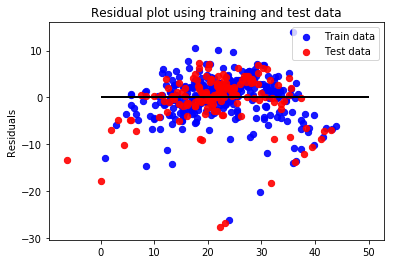

In [58]:
# Now lets visualize the difference between predicted and original data with a horizontal line at 0
# Plots on the Line 0 means the value predicted and original data are matching
%matplotlib inline
plt.scatter(pred_train,pred_train- Y_train,c="b",s=40,alpha=0.9, label = 'Train data')
plt.scatter(pred_test,pred_test- Y_test,c="r",s=40,alpha=0.9,  label = 'Test data')
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')

# Y label
plt.ylabel("Residuals")

## plot title
plt.title("Residual plot using training and test data")

plt.show()